# Exploration 03
## Ïπ¥Î©îÎùº Ïä§Ìã∞Ïª§Ïï± ÎßåÎì§Í∏∞

---
#### opencv, dlib Îì±Ïùò ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄ ÏÜçÏùò Î™®Îç∏Ïóê Ïä§Ìã∞Ïª§Î•º Î∂ÄÏ∞©ÌïòÎäî Ïä§Ìã∞Ïª§Ïï±ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Îäî ÌîÑÎ°úÏ†ùÌä∏

In [34]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨Î•º ÏúÑÌïú opencvÏôÄ ÎÖ∏Ìä∏Î∂ÅÏóê Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌïú matplolibÏùÑ ÏùΩÏñ¥Ïò®Îã§.

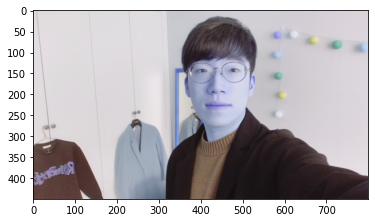

In [39]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò§Í∏∞
img_show = img_bgr.copy()      # ÏúÑ Ïù¥ÎØ∏ÏßÄÎäî Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò§Îäî Ïö©ÎèÑÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îã§Î•∏ Î≥ÄÏàòÏóê Ï†ÄÏû•Ìï¥Ï§ÄÎã§.
plt.imshow(img_bgr)
plt.show()

opencvÎ°ú Î∂àÎü¨Ïò® Ïù¥ÎØ∏ÏßÄÎäî BGR ÌååÏùºÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, RGBÎ°ú Î∞îÍæ∏Îäî Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌïòÎã§.

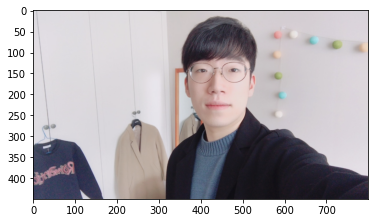

In [3]:
# plt.imshow 
# Ïù¥ÎØ∏ÏßÄ RGB Î°ú Î∞îÍæ∏Í∏∞
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [40]:
# detectorÎ•º ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(345, 98) (531, 284)]]


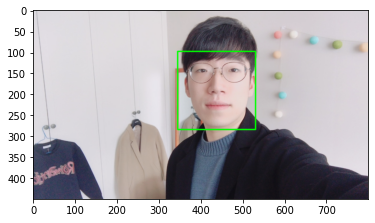

In [6]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
print(dlib_rects)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


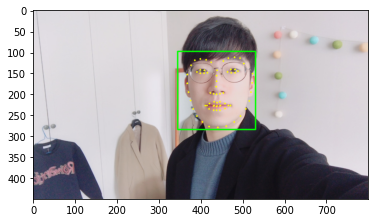

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(437, 182)
(x,y) : (437,89)
(w,h) : (187,187)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [12]:
refined_x = x - w // 2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,89)


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,89)


In [14]:
# Í∏∏Ïñ¥ÏÑú Î≥µÏû°Ìï¥ Î≥¥Ïù¥ÏßÄÎßå img_show[from:to] ÌòïÏãù
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

Ïäù~


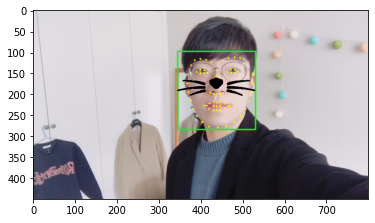

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

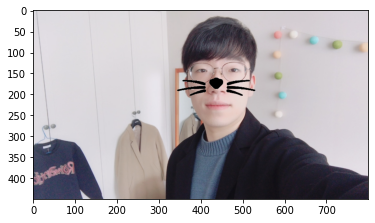

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

ÏúÑ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎäî Î™®Îç∏Ïù¥ Ï†ïÎ©¥ÏùÑ Î≥¥Í≥† ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÅÎèÑÏóê ÎåÄÌïú Í≥†Î†§Îäî ÌÅ¨Í≤å ÌïòÏßÄ ÏïäÏïÑÎèÑ ÏÉÅÍ¥ÄÏóÜÎã§. <br>
ÎßåÏïΩ Î™®Îç∏Ïùò ÏñºÍµ¥Ïù¥ Í∏∞Ïö∏Ïñ¥Ï†∏ ÏûàÎã§Î©¥ Ïù¥Î•º Í∞êÏßÄÌïòÍ≥† Ïä§Ìã∞Ïª§ ÏûêÏ≤¥ÎèÑ ÌöåÏ†ÑÌï¥Ïïº Ìï†Í≤ÉÏù¥Îã§. <br>
ÏïÑÎûòÏùò ÏΩîÎìúÎäî Î™®Îç∏Ïùò ÏñºÍµ¥Ïù¥ Í∏∞Ïö∏Ïñ¥ÏßÑ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïòÏó¨, Ïù¥Î•º Í≥†Î†§ÌïòÏó¨ Îã§Ïãú ÏûëÏÑ±Ìïú ÏΩîÎìúÏù¥Îã§.

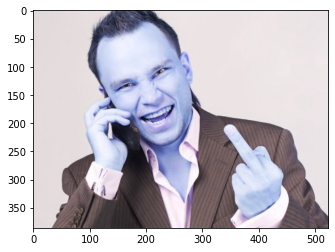

In [17]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/sample.png'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()     
plt.imshow(img_bgr)
plt.show()

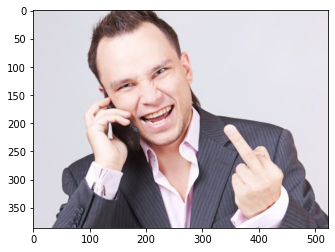

In [18]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

_Ïù¥ÎØ∏ÏßÄÎäî ÏÇ¨ÏßÑÏùÑ Ï∞æÎã§Í∞Ä Î™®Îç∏Ïùò ÏñºÍµ¥Ïù¥ ÏûòÎ≥¥Ïù¥Î©¥ÏÑú Í≥†Í∞úÍ∞Ä ÎèåÏïÑÍ∞Ñ Í≤ÉÏù¥ ÎÑàÎ¨¥ Ï†ÅÏ†àÌïòÏó¨ ÏÑ†Ï†ïÌïòÍ≤å ÎêòÏóàÎã§..._

In [19]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [20]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(132, 81) (287, 236)]]


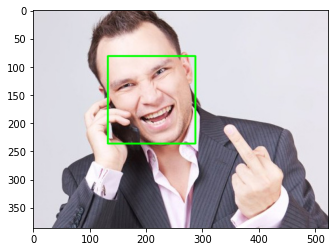

In [21]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [22]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [23]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


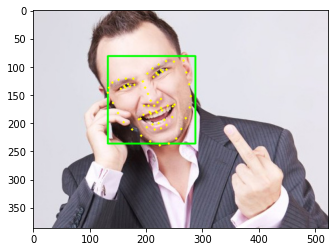

In [24]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

LandmarkÍ∞Ä Î™®Îç∏Ïùò ÏñºÍµ¥ Í∞ÅÎèÑÎ•º Í≥†Î†§ÌïòÏó¨ ÌëúÏãúÎêú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(208, 160)
(x,y) : (208,82)
(w,h) : (156,156)


In [26]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [27]:
refined_x = x - w // 2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (130,82)


In [28]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (130,82)


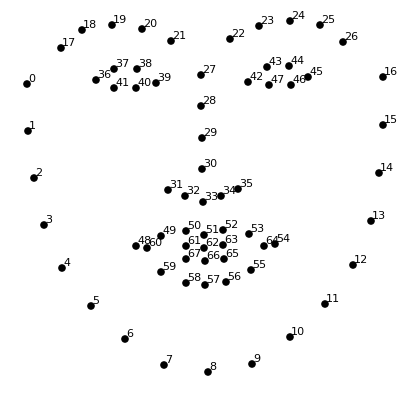

ÏúÑ ÎûúÎìúÎßàÌÅ¨Î•º Î≥¥Î©¥ 27Î≤à Ìè¨Ïù∏Ìä∏ÏôÄ ÏΩîÏùò Ï†ïÏ§ëÏóê Ìï¥ÎãπÌïòÎäî 30Î≤à Ìè¨Ïù∏Ìä∏Î•º Ïù¥ÏùÄ ÏßÅÏÑ†ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ÏÑú Î™®Îç∏Ïùò ÏñºÍµ¥Ïù¥ ÏñºÎßàÎÇò ÌöåÏ†ÑÌñàÎäîÏßÄÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎã§.<br>
Ïù¥ÎØ∏ÏßÄÏùò ÏÑ∏Î°úÏ∂ïÍ≥º 27Î≤àÍ≥º 30Î≤à Ìè¨Ïù∏Ìä∏Î•º Ïù¥ÏùÄ ÏßÅÏÑ†Ïù¥ Ïù¥Î£®Îäî Í∞ÅÎèÑÎ•º $\theta$Îùº ÌïòÎ©¥, Ïù¥ $\theta$Î•º Íµ¨ÌïòÎäî ÏãùÏùÄ ÏïÑÎûòÏôÄ Í∞ôÎã§.
$$
\theta =tan^{-1}{ \frac{x_{30}-x_{27}}{y_{30}-y_{27}}}
$$

ÏúÑ ÏàòÏãùÏùÑ ÌíÄÎ©¥ $\theta$Îäî radianÏù¥ÎØÄÎ°ú Ïù¥Î•º Í∞ÅÎèÑÎ°ú Î≥ÄÌôò ÌïòÍ∏∞ ÏúÑÌï¥ $180\over\pi$ Î•º Í≥±Ìï¥Ï£ºÏñ¥ÏÑú Î≥ÄÌôòÌï† Ïàò ÏûàÎã§.

In [29]:
import math
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print(rotate_angle)

22.380135051959574


ÏúÑ Í≥ºÏ†ïÏùÑ Ïù¥Ïö©Ìï¥ ÎèåÏïÑÍ∞Ñ ÌöåÏ†Ñ Í∞ÅÎèÑÍ∞Ä 22.38ÎèÑÏûÑÏùÑ Ïïå Ïàò ÏûàÎã§.

(156, 156, 3)


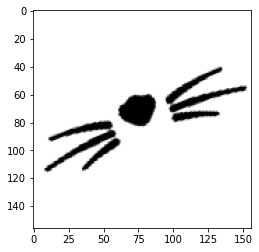

In [30]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
    return result

img_rotate = rotate_image(img_sticker,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

ÌöåÏ†ÑÍ∞ÅÎèÑÏóê ÎåÄÌïòÏó¨ ÌöåÏ†ÑÌïòÎäî Ïù¥ÎØ∏ÏßÄÎ•º Îã§Ïãú ÌëúÏãúÌïòÎ©¥ ÏúÑ Ïù¥ÎØ∏ÏßÄÏôÄ Í∞ôÎã§.

In [36]:
sticker_area = img_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]

img_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)


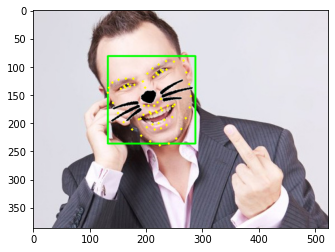

In [37]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

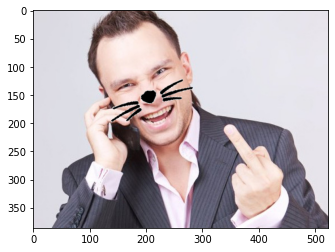

In [38]:
sticker_area = img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]
img_bgr[refined_y:refined_y +img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

Ïù¥ÎØ∏ÏßÄÏùò Ïä§Ìã∞Ïª§Í∞Ä Î™®Îç∏Ïùò ÏñºÍµ¥Ïù¥ ÌöåÏ†ÑÌïúÎßåÌÅº ÎèåÏïÑÍ∞Ä Ï†ÅÏö©Îêú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

# ÌöåÍ≥†

## ÌîÑÎ°úÏ†ùÌä∏Ïóê ÎåÄÌïú ÌèâÍ∞Ä
<br>
Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî opencvÏôÄ dlibÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏùò Î™®Îç∏Ïóê ÎåÄÌïú landmarkÎ•º Ï∞çÏñ¥ Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§ ÏÇ¨ÏßÑÏùÑ Î∂ÄÏ∞©ÌïòÎäî ÌîÑÎ°úÏ†ùÌä∏Ïù¥Îã§.
<br><br>
Ï≤òÏùå ÏΩîÎìúÏóê ÎåÄÌï¥ÏÑúÎäî Î™®Îç∏Ïùò ÏñºÍµ¥Ïù¥ Ï†ïÎ©¥ÏùÑ Î∞îÎùºÎ≥¥Í≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Í≥†Í∞úÎ•º Í∏∞Ïö∏Ïù¥Îäî Ï†êÏóê ÎåÄÌï¥ÏÑúÎäî Í≥†Î†§ÌïòÏßÄ ÏïäÏùÄ ÏΩîÎìúÏù¥ÏßÄÎßå, Ïù¥ÌõÑ Í≥†Í∞úÎ•º ÎèåÎ¶¥ Îïå Í≥†Í∞úÏôÄ Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ïùò Í∞ÅÎèÑÎ•º Í≥†Î†§ÌïòÏó¨ Ïä§Ìã∞Ïª§Î•º Î∂ÄÏ∞©ÌïòÎäî ÎÇ¥Ïö©ÏùÑ Ï∂îÍ∞ÄÌïòÏòÄÎã§.
<br><br>
Îã§Îßå Îã®ÏàúÌûà 2-DÏóê ÎåÄÌïòÏó¨ Í∞ÅÎèÑÎ•º Í≥†Î†§Ìïú Í≤ÉÏùº Îøê, Í≥†Í∞úÎ•º ÎÅÑÎçïÏù¥Í±∞ÎÇò ÌöåÏ†ÑÌïòÎäî Îì±Ïùò Ïù¥ÎØ∏ÏßÄÏóêÏÑúÎäî ÏàòÏóºÏùò Î™®ÏñëÏù¥ ÌèâÎ©¥Ï†ÅÏúºÎ°ú Î≥ÄÌôîÌïòÍ≤å Îê† Í≤ÉÏù∏Îç∞, Í∑∏Í≤ÉÏóê ÎåÄÌï¥ÏÑúÎäî Í≥†Î†§ÌïòÏßÄ Î™ªÌïúÏ†êÏù¥ ÏïÑÏâΩÎã§. ÎòêÌïú Ïù∏Î¨ºÏù¥ Ïó¨Îü¨Î™Ö ÎÇòÏò§Îäî ÏÇ¨ÏßÑÏóê ÎåÄÌï¥ÏÑúÎèÑ ÌÖåÏä§Ìä∏Î•º Ìï¥ Î≥¥ÏïòÎäîÎç∞ Ìï¥Îãπ ÏΩîÎìúÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© Ïãú, Îëê Ïù∏Î¨ºÏóê ÎåÄÌïú landmarkÎäî Î™®Îëê ÌëúÏãúÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌïòÏòÄÏßÄÎßå, Ïã§Ï†úÎ°ú Ïä§Ìã∞Ïª§Í∞Ä Î∂ÄÏ∞©ÎêòÎäî ÏñºÍµ¥ÏùÄ ÌïòÎÇò ÎøêÏù¥ÏóàÎã§. Îã§ÏàòÏùò Î™®Îç∏Ïù¥ Îì±Ïû•ÌïòÎäî ÏÇ¨ÏßÑÏóê ÎåÄÌï¥ÏÑúÎäî Í≥†Î†§ÌïòÏßÄ Î™ªÌïú ÏΩîÎìúÎùºÎäî Í≤ÉÏù¥Îã§. Í∑∏ Ïù¥Ïú†Îäî ÏΩîÏùò ÏúÑÏπòÎ•º Ï∞æÎäî for Î¨∏ÏùÑ ÏÇ¥Ìé¥Î≥¥Î©¥ Ïïå Ïàò ÏûàÎäîÎç∞, for Î¨∏ÏóêÏÑú ÎßàÏßÄÎßâÏóê Ïù∏ÏãùÎêú ÏñºÍµ¥Ïóê ÎåÄÌï¥ÏÑúÎßå xÏ¢åÌëúÏôÄ yÏ¢åÌëúÎ•º Ï†ÄÏû•ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∑∏ Ïù¥Ï†ÑÏóê Ïù∏ÏãùÎêú Ï¢åÌëúÎ•º Ï†ÄÏû•ÌïòÏßÄ Î™ªÌïòÏòÄÎã§. Îî∞ÎùºÏÑú Ìï¥Îãπ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî xÏ¢åÌëúÏôÄ yÏ¢åÌëúÎ•º list ÌòïÏãùÏúºÎ°ú ÎßåÎì§Ïñ¥ Í∞ÅÍ∞ÅÏùò ÏñºÍµ¥Ïóê Î™®Îëê Ïä§Ìã∞Ïª§Í∞Ä Î∂ÄÏ∞©Ïù¥ Îê† Ïàò ÏûàÎèÑÎ°ù ÌïòÎ©¥ Ìï¥Í≤∞Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

<br><br><br>


## ÌõÑÍ∏∞
<br>
Ï≤òÏùåÏúºÎ°ú opencv, dlibÏùÑ Ïù¥Ïö©Ìïú ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÏó¨ Ïñ¥Î†§Ïö¥Ï†êÎèÑ ÏûàÏóàÍ≥† Î∂ÄÏ°±Ìïú Ï†êÎèÑ ÏûàÏóàÎçò Í≤É Í∞ôÎã§. ÌèâÍ∞ÄÏóêÏÑú Ïñ∏Í∏âÎêú Î¨∏Ï†úÏóê ÎåÄÌï¥ÏÑú ÏΩîÎî©Ïóê ÎåÄÌïú Ïó≠ÎüâÍ≥º Î®∏Ïã†Îü¨Îãù Î∞è Îî•Îü¨ÎãùÏóê ÎåÄÌïú Ïù¥Ìï¥ÎèÑÎ•º ÎÜíÏó¨ Î≥¥Îã§ ÏàòÏõîÌïòÍ≤å ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌï† Ïàò ÏûàÎèÑÎ°ù Ï¶ùÏßÑÌï¥ÏïºÍ≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ Îì†Îã§.


## Reference
<br>
https://velog.io/@dldndyd01/OpenCV-%EC%9D%B4%EB%AF%B8%EC%A7%80-%ED%9A%8C%EC%A0%84%EC%A4%91%EC%95%99-%EA%B8%B0%EC%A4%80-%ED%9A%8C%EC%A0%84-cv2.getRotationMatrix2D-%EC%96%BC%EA%B5%B4-%ED%9A%8C%EC%A0%84-%EA%B0%81%EB%8F%84-%EA%B5%AC%ED%95%98%EA%B8%B0
<br>

_Ïù¥ÎØ∏ÏßÄ Î™®Îç∏Ïùò ÌöåÏ†ÑÏóê ÎåÄÌïú ÏΩîÎìúÎ•º Ï∞∏Í≥†ÌïòÏòÄÎã§._